In [16]:
import pandas as pd

# Loading the dataset
file_path = 'amazon_review.csv'  
data = pd.read_csv(file_path)

# Check the first few rows
print(data.head())


       reviewerID        asin  reviewerName helpful  \
0  A3SBTW3WS4IQSN  B007WTAJTO           NaN  [0, 0]   
1  A18K1ODH1I2MVB  B007WTAJTO          0mie  [0, 0]   
2  A2FII3I2MBMUIA  B007WTAJTO           1K3  [0, 0]   
3   A3H99DFEG68SR  B007WTAJTO           1m2  [0, 0]   
4  A375ZM4U047O79  B007WTAJTO  2&amp;1/2Men  [0, 0]   

                                          reviewText  overall  \
0                                         No issues.      4.0   
1  Purchased this for my device, it worked as adv...      5.0   
2  it works as expected. I should have sprung for...      4.0   
3  This think has worked out great.Had a diff. br...      5.0   
4  Bought it with Retail Packaging, arrived legit...      5.0   

                                  summary  unixReviewTime  reviewTime  \
0                              Four Stars      1406073600  2014-07-23   
1                           MOAR SPACE!!!      1382659200  2013-10-25   
2               nothing to really say....      1356220800  

In [17]:
# Check all column names to find the correct name for the star ratings column
print(data.columns)



Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime', 'day_diff',
       'helpful_yes', 'total_vote'],
      dtype='object')


In [18]:
# Assuming the column for star ratings is named 'overall'
overall_counts = data['overall'].value_counts()

# Print the distribution of star ratings
print(overall_counts)


5.0    3922
4.0     527
1.0     244
3.0     142
2.0      80
Name: overall, dtype: int64


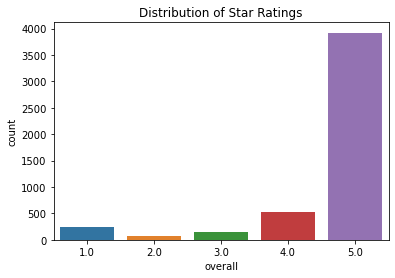

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of ratings
sns.countplot(x='overall', data=data)
plt.title('Distribution of Star Ratings')
plt.show()


In [20]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = data[data['overall'] == 5]
minority_class = data[data['overall'] != 5]

# Downsample majority class
majority_class_downsampled = resample(majority_class,
                                      replace=False,    # sample without replacement
                                      n_samples=len(minority_class),  # match minority class size
                                      random_state=42)  # for reproducibility

# Combine minority class with downsampled majority class
balanced_data = pd.concat([majority_class_downsampled, minority_class])

# Check new class distribution
print(balanced_data['overall'].value_counts())


5.0    993
4.0    527
1.0    244
3.0    142
2.0     80
Name: overall, dtype: int64


In [21]:
# Upsample minority class
minority_class_upsampled = resample(minority_class,
                                    replace=True,     # sample with replacement
                                    n_samples=len(majority_class),  # match majority class size
                                    random_state=42)  # for reproducibility

# Combine majority class with upsampled minority class
balanced_data = pd.concat([majority_class, minority_class_upsampled])

# Check new class distribution
print(balanced_data['overall'].value_counts())


5.0    3922
4.0    2017
1.0     946
3.0     620
2.0     339
Name: overall, dtype: int64


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming the reviews are in a column called 'reviewText'
tfidf = TfidfVectorizer(max_features=5000)  # You can change max_features as needed
X = tfidf.fit_transform(balanced_data['summary'])

# Assuming 'rating' is your target variable
y = balanced_data['overall']


In [23]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(X_train.shape, X_test.shape)


(6275, 1902) (1569, 1902)


In [24]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.84      0.85      0.85       184
         2.0       0.88      0.51      0.65        68
         3.0       0.89      0.58      0.70       130
         4.0       0.68      0.50      0.58       400
         5.0       0.73      0.90      0.81       787

    accuracy                           0.75      1569
   macro avg       0.80      0.67      0.72      1569
weighted avg       0.75      0.75      0.74      1569

[[157   5   2   4  16]
 [ 11  35   2   2  18]
 [ 13   0  75  13  29]
 [  4   0   1 201 194]
 [  2   0   4  75 706]]
